In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(15.561136329200934, 26.691245660677794),
 (36.41748509499958, -22.72254698020967),
 (-49.47886341144222, -77.93610159752525),
 (75.70699564912076, 88.71818245299619),
 (7.368892701608019, -147.03488725672895),
 (75.74704011181151, 162.6295480495882),
 (-27.753325011959305, 22.690952877654695),
 (-71.10654091480265, -129.6934303147025),
 (-40.604642414313666, -63.95301823088835),
 (84.07431225809262, 29.922923134254262),
 (53.56634323355982, -52.72913156676711),
 (5.868603992872153, 84.58618444020993),
 (74.58784253156529, 55.86696797241609),
 (69.04114755453594, -131.06351827671065),
 (-46.86168135135944, 25.272467399134342),
 (-21.0220168051531, -61.93454473095029),
 (-86.60517740770551, -31.15703971785385),
 (-45.07816597545459, 63.046818472515014),
 (-58.72840774764765, -28.684279914490503),
 (7.735469525464367, -8.198867827902092),
 (-44.26471421618011, -84.12406799515078),
 (53.48449295979023, -69.74241556485555),
 (50.60321658350804, -83.47868538509684),
 (-58.29605065187863, 6

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b19f44b299f774130882793c1cc2a222


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | umm kaddadah
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | coihaique
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | kathu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | viedma
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | saint anthony
Processing Record 12 of Set 1 | kalmunai
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | boyuibe
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | lola
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | port-cartier
Processing Record 23 of Set 1 | hearst
Processing Record 24 

Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | inirida
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | imbituba
Processing Record 48 of Set 4 | shushenskoye
Processing Record 49 of Set 4 | marsaxlokk
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | bethel
Processing Record 6 of Set 5 | hobart
Processing Record 7 of Set 5 | san julian
Processing Record 8 of Set 5 | greencastle
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | broken hill
Processing Record 11 of Set 5 | dekoa
City not found. Skipping...
Processing Record 12 of Set 5 | evensk
Processing Record 13 of Set 5 | provideniya
Processing Record 14 of Set 5 | nelson bay
Processing Record 

Processing Record 29 of Set 8 | poronaysk
Processing Record 30 of Set 8 | itarema
Processing Record 31 of Set 8 | vytegra
Processing Record 32 of Set 8 | san quintin
Processing Record 33 of Set 8 | camacha
Processing Record 34 of Set 8 | aripuana
Processing Record 35 of Set 8 | ketchikan
Processing Record 36 of Set 8 | laguna
Processing Record 37 of Set 8 | amuntai
Processing Record 38 of Set 8 | kurilsk
Processing Record 39 of Set 8 | oranjestad
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | vestmannaeyjar
Processing Record 42 of Set 8 | lacombe
Processing Record 43 of Set 8 | matagami
Processing Record 44 of Set 8 | mpulungu
Processing Record 45 of Set 8 | rey bouba
Processing Record 46 of Set 8 | alanya
Processing Record 47 of Set 8 | beringovskiy
Processing Record 48 of Set 8 | samarai
Processing Record 49 of Set 8 | aklavik
Processing Record 50 of Set 8 | linxia
Processing Record 1 of Set 9 | golden
Processing Record 2 of Set 9 | batemans bay
Proce

Processing Record 16 of Set 12 | moussoro
Processing Record 17 of Set 12 | belchatow
Processing Record 18 of Set 12 | sain alto
Processing Record 19 of Set 12 | lamu
Processing Record 20 of Set 12 | la primavera
Processing Record 21 of Set 12 | san luis
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | malwan
City not found. Skipping...
Processing Record 24 of Set 12 | mackay
Processing Record 25 of Set 12 | namibe
Processing Record 26 of Set 12 | eluru
Processing Record 27 of Set 12 | waddan
Processing Record 28 of Set 12 | baruun-urt
Processing Record 29 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 12 | novikovo
Processing Record 31 of Set 12 | asuncion
Processing Record 32 of Set 12 | rogovskaya
Processing Record 33 of Set 12 | kuytun
Processing Record 34 of Set 12 | olga
Processing Record 35 of Set 12 | chishtian mandi
Processing Record 36 of Set 12 | necochea
Processing Record 37 of Set 12 | ustikolina
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Umm Kaddadah,13.60,26.69,89.51,42,79,7.45,SD,2020-08-04 18:21:05
1,Vila Franca Do Campo,37.72,-25.43,75.20,78,20,11.41,PT,2020-08-04 18:21:05
2,Coihaique,-45.58,-72.07,48.20,66,40,4.70,CL,2020-08-04 18:21:05
3,Talnakh,69.49,88.40,64.40,88,98,8.95,RU,2020-08-04 18:21:06
4,Hilo,19.73,-155.09,75.20,57,90,6.93,US,2020-08-04 18:17:26


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Kaddadah,SD,2020-08-04 18:21:05,13.60,26.69,89.51,42,79,7.45
1,Vila Franca Do Campo,PT,2020-08-04 18:21:05,37.72,-25.43,75.20,78,20,11.41
2,Coihaique,CL,2020-08-04 18:21:05,-45.58,-72.07,48.20,66,40,4.70
3,Talnakh,RU,2020-08-04 18:21:06,69.49,88.40,64.40,88,98,8.95
4,Hilo,US,2020-08-04 18:17:26,19.73,-155.09,75.20,57,90,6.93


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#(6.3.1)
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

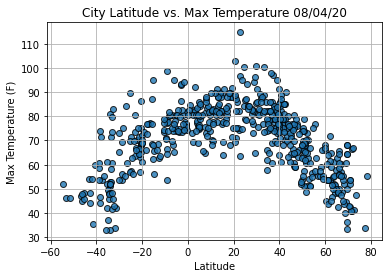

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

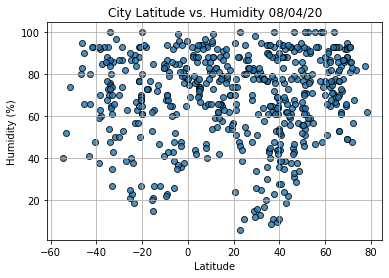

In [16]:
#(6.3.2) Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

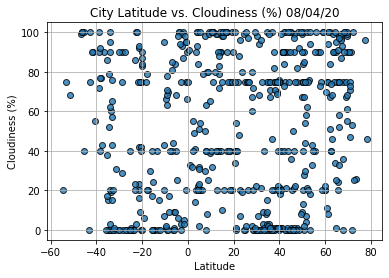

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

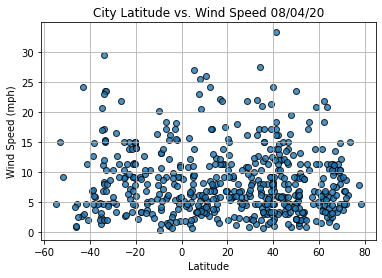

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"City Latitude vs. "+ y_label + " " + time.strftime("%x"))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

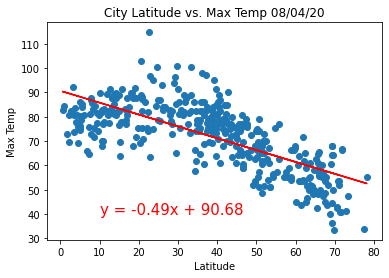

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

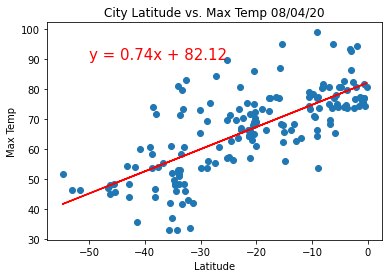

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

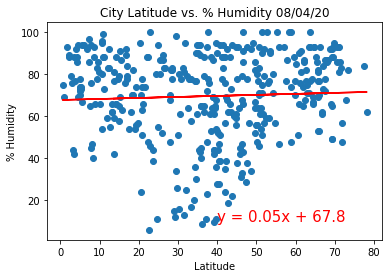

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

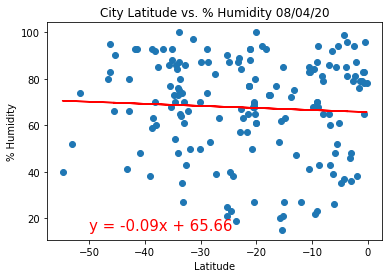

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [25]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Kaddadah,SD,2020-08-04 18:21:05,13.60,26.69,89.51,42,79,7.45
1,Vila Franca Do Campo,PT,2020-08-04 18:21:05,37.72,-25.43,75.20,78,20,11.41
3,Talnakh,RU,2020-08-04 18:21:06,69.49,88.40,64.40,88,98,8.95
4,Hilo,US,2020-08-04 18:17:26,19.73,-155.09,75.20,57,90,6.93
5,Cherskiy,RU,2020-08-04 18:21:06,68.75,161.30,40.12,92,100,10.07


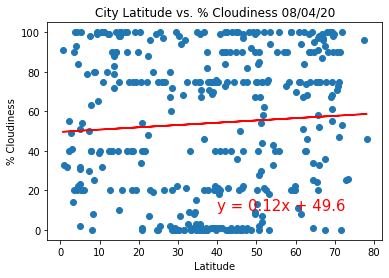

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

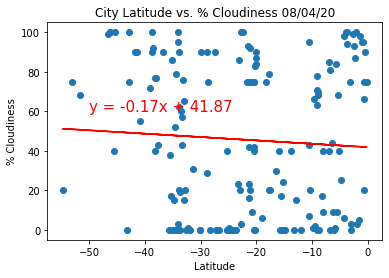

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

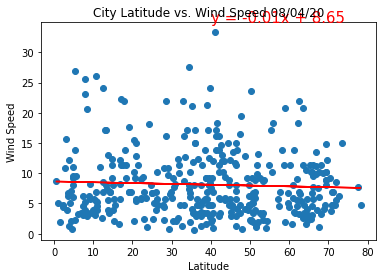

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))